# Model Testing

In [2]:
import re
import pandas as pd
import numpy as np

## Data Import

In [13]:
file2=pd.read_csv('Data3.csv', encoding='ISO-8859-1', error_bad_lines=False)
pairs=np.column_stack((file2.loc[:2998, ["SR Summary"]]["SR Summary"], file2.loc[:2998, ["Group Issue"]]["Group Issue"]))
features_used = np.genfromtxt('features.csv', delimiter=",", dtype=None).astype(np.dtype(str))
pairs

/home/tony/Desktop/SDCard/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (25,43,46) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/tony/Desktop/SDCard/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  This is separate from the ipykernel package so we can avoid doing imports until


array([['COMPLETE FOOT PEDAL WIRING', '1'],
       ['inspection, dielectric. leak at digger(fitting in cab) ,remove extension shaft from winch,emg. stop not working at controls, boom cuts out(wait or play with outriggers works)',
        '3,'],
       ['ANNUAL PM, DIELECTRIC AND DOT INSPECTION', '2,3,'],
       ...,
       ['PERFORM UCR', '18'],
       ['UCR', '18'],
       ['ON RENT TO IB ABLE - UCR (BREAK IN DAMAGES)', '18']],
      dtype=object)

In [14]:
pairs[:,0]=[re.sub(r"  +"," ",re.sub(r"(?![\w\s]).", " ",line).lower()).strip() for line in pairs[:,0]]
triples = np.column_stack((pairs, [re.sub(r"  +"," ",re.sub(r"( (and|or|not) )((and|or|not) )*"," ",line)).strip() for line in pairs[:,0]]))
triples[1,0]

'inspection dielectric leak at digger fitting in cab remove extension shaft from winch emg stop not working at controls boom cuts out wait or play with outriggers works'

In [15]:
triples['2' == triples[:,1],1] = '23'
triples['3' == triples[:,1],1] = '23'
triples['2,3' == triples[:,1],1] = '23'

In [16]:
def containsComma(array):
    x = []
    i = 0
    for row in array:
        if type(row[1]) == str and not "," in row[1]: 
            x += [row]
        i +=1
    return x

data=containsComma(triples.tolist())
data=np.array([np.array(row) for row in data])
data

array([['complete foot pedal wiring', '1', 'complete foot pedal wiring'],
       ['service request', '5', 'service request'],
       ['service request', '5', 'service request'],
       ...,
       ['perform ucr', '18', 'perform ucr'],
       ['ucr', '18', 'ucr'],
       ['on rent to ib able ucr break in damages', '18',
        'on rent to ib able ucr break in damages']], dtype='<U234')

In [17]:
binary=[]
for index in range(0, len(data)):
    binary += [[int(feature in data[index,0]) for feature in features_used[:-20]] + [int(feature in data[index,2]) for feature in features_used[-20:]]]
    
final_data = []
for index in range(0, len(data)):
    final_data += [[binary[index], data[index, 1]]]

binary[0]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

## Stochastic Gradient Descent

In [18]:
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier(random_state=0).fit(binary[:int(0.9 * len(binary))], data[:int(0.9 * len(binary)),1])
SGD.score(binary[int(0.9 * len(binary)):], data[int(0.9 * len(binary)):,1])

/home/tony/Desktop/SDCard/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.7785234899328859

## Support Vector Classifier

In [19]:
from sklearn.svm import SVC
SVM = SVC(random_state=0).fit(binary[:int(0.9 * len(binary))], data[:int(0.9 * len(binary)),1])
SVM.score(binary[int(0.9 * len(binary)):], data[int(0.9 * len(binary)):,1])

0.7885906040268457

## Decision Tree Classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state=0).fit(binary[:int(0.9 * len(binary))], data[:int(0.9 * len(binary)),1])
DT.score(binary[int(0.9 * len(binary)):], data[int(0.9 * len(binary)):,1])

0.7651006711409396

## Gradient Tree Boosting Classifier

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
GBTC = GradientBoostingClassifier(random_state=0).fit(binary[:int(0.9 * len(binary))], data[:int(0.9 * len(binary)),1])
GBTC.score(binary[int(0.9 * len(binary)):], data[int(0.9 * len(binary)):,1])

0.8489932885906041

## Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(random_state=0).fit(binary[:int(0.9 * len(binary))], data[:int(0.9 * len(binary)),1])
RFC.score(binary[int(0.9 * len(binary)):], data[int(0.9 * len(binary)):,1])

0.7718120805369127

In [65]:
from sklearn.utils import shuffle

X, y = shuffle(binary[:x_vals[x]],data[:x_vals[x],1],random_state=0)
x_vals=list(range(498,3000,500))
y_sgd=list(range(len(x_vals)))
y_svm=list(range(len(x_vals)))
y_dt=list(range(len(x_vals)))
y_gtb=list(range(len(x_vals)))
y_rfc=list(range(len(x_vals)))

for x in range(len(x_vals)):
    train_data_x=X[:int(0.9 * x_vals[x])]
    train_data_y=y[:int(0.9 * x_vals[x])]
    test_data_x=X[int(0.9 * x_vals[x]):x_vals[x]]
    test_data_y=y[int(0.9 * x_vals[x]):x_vals[x]]
    SGD=SGDClassifier(random_state=0).fit(train_data_x,train_data_y)
    SVM = SVC(random_state=0).fit(train_data_x,train_data_y)
    DT = DecisionTreeClassifier(random_state=0).fit(train_data_x,train_data_y)
    GBTC = GradientBoostingClassifier(random_state=0).fit(train_data_x,train_data_y)
    RFC = RandomForestClassifier(random_state=0).fit(train_data_x,train_data_y)
    y_sgd[x]=SGD.score(test_data_x,test_data_y)
    y_svm[x]=SVM.score(test_data_x,test_data_y)
    y_dt[x]=DT.score(test_data_x,test_data_y)
    y_gtb[x]=GBTC.score(test_data_x,test_data_y)
    y_rfc[x]=RFC.score(test_data_x,test_data_y)

/home/tony/Desktop/SDCard/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/tony/Desktop/SDCard/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), Futur

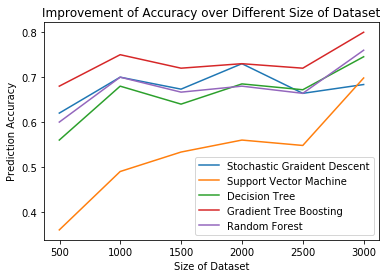

In [66]:
import matplotlib.pyplot as plt
plt.plot(x_vals, y_sgd, label="Stochastic Graident Descent")
plt.plot(x_vals, y_svm, label="Support Vector Machine")
plt.plot(x_vals, y_dt, label="Decision Tree")
plt.plot(x_vals, y_gtb, label="Gradient Tree Boosting")
plt.plot(x_vals, y_rfc, label="Random Forest")
plt.title('Improvement of Accuracy over Different Size of Dataset')
plt.xlabel('Size of Dataset')
plt.ylabel('Prediction Accuracy')
plt.legend()
plt.show()

In [46]:
len(data[:int(0.9 * x_vals[0]),1])

448

In [56]:
from sklearn.utils import shuffle

X, y = shuffle(binary[:x_vals[x]],data[:x_vals[x],1],random_state=0)

In [60]:
Shuffled_y[0:10]

array(['10', '8', '5', '1', '4', '18', '23', '13', '1', '1'],
      dtype='<U234')

In [62]:
len(Shuffled_y)

2973

In [63]:
data[0:10,1]

array(['1', '5', '5', '7', '7', '5', '8', '5', '5', '5'], dtype='<U234')